# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = boston.target

## Perform a train-test-split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.2)

## Apply your model to the train set

#### Importing and initializing the model class

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()

#### Fitting the model to the train data

In [6]:
lin_reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions on the train set, and on the test set

In [7]:
y_train_pred = lin_reg_model.predict(X_train)
y_test_pred = lin_reg_model.predict(X_test)

#### Calculating your residuals

In [8]:
from sklearn import metrics
res_train = y_train_pred - y_train
res_test = y_test_pred - y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [9]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

In [10]:
print(RMSE_train)
print(RMSE_test)

4.720452098147144
4.440533198787919


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [11]:
def build_model (X,y,split_size=None):
    X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = split_size)
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train,y_train)
    y_train_pred = lin_reg_model.predict(X_train)
    y_test_pred = lin_reg_model.predict(X_test)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
    return (split_size,RMSE_train, RMSE_test)

In [12]:
outputs = [build_model (X,y,split_size=i/100) for i in range(5,96)]
    

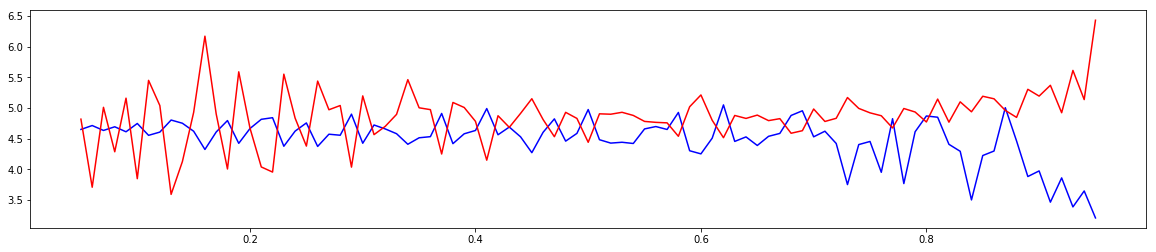

In [13]:
df = pd.DataFrame(outputs, columns= ["size","RMSE_Train","RMSE_Test"])
fig = plt.figure(figsize=(20,4))
plt.plot(df["size"],df["RMSE_Train"], color = "blue");
plt.plot(df["size"],df["RMSE_Test"], color = "red");

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [21]:
def average_split_RMSE (X,y,split_size):
    RMSE_list =[ build_model (X,y,split_size) for i in range (0,100)]
    df = pd.DataFrame(RMSE_list, columns= ["size","RMSE_Train","RMSE_Test"])
    #df.drop("size", axis =1).mean()
    print ("For split:{} RMSE_Train: {} , RMSE_Test: {} ".format(split_size, df.RMSE_Train.mean(), df.RMSE_Test.mean()))
    return (split_size,df.RMSE_Train.mean(), df.RMSE_Test.mean())

In [22]:
average_split_RMSE(X,y,split_size=0.5)

For split:0.5 RMSE_Train: 4.6164766364984375 , RMSE_Test: 4.780224290967964 


(0.5, 4.6164766364984375, 4.780224290967964)

In [23]:
outputs2 = [average_split_RMSE (X,y,split_size=i/100) for i in range(5,96)]

For split:0.05 RMSE_Train: 4.662190677684142 , RMSE_Test: 4.5014729777518525 
For split:0.06 RMSE_Train: 4.6659371203799225 , RMSE_Test: 4.499923429399275 
For split:0.07 RMSE_Train: 4.653625248160507 , RMSE_Test: 4.68255389489383 
For split:0.08 RMSE_Train: 4.656306590482996 , RMSE_Test: 4.661159507447386 
For split:0.09 RMSE_Train: 4.651090599239297 , RMSE_Test: 4.69716776997234 
For split:0.1 RMSE_Train: 4.659723853974905 , RMSE_Test: 4.642557466389078 
For split:0.11 RMSE_Train: 4.633918925371519 , RMSE_Test: 4.851539327107335 
For split:0.12 RMSE_Train: 4.654318061965652 , RMSE_Test: 4.697323879350485 
For split:0.13 RMSE_Train: 4.642512768351983 , RMSE_Test: 4.779472533659993 
For split:0.14 RMSE_Train: 4.646664620833922 , RMSE_Test: 4.742840247953803 
For split:0.15 RMSE_Train: 4.645315853341217 , RMSE_Test: 4.744733723352164 
For split:0.16 RMSE_Train: 4.64883363960415 , RMSE_Test: 4.738509395644356 
For split:0.17 RMSE_Train: 4.645560275822175 , RMSE_Test: 4.741461082415156 
F

In [24]:
df2 = pd.DataFrame(outputs2, columns= ["size","RMSE_Train_mean","RMSE_Test_mean"])

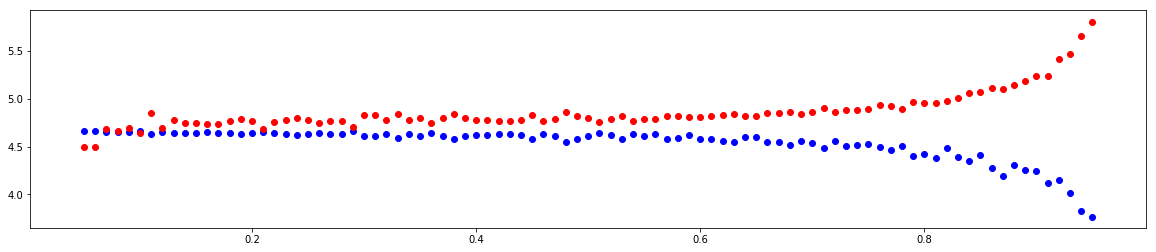

In [26]:
fig2 = plt.figure(figsize=(20,4))
plt.scatter(df2["size"],df2["RMSE_Train_mean"], color = "blue");
plt.scatter(df2["size"],df2["RMSE_Test_mean"], color = "red");

With an increase in size of the Test set there comes an increas in error size. This means there is a certain point from which on the training data is not sufficient enough to build a good enough model to explain the test data

What's happening here? evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.